## Installition And Load Dataset

In [ ]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="token")
project = rf.workspace("sajjad-aemmi").project("persian-license-plate-detection")
dataset = project.version(7).download("yolov8")

In [ ]:
!pip -q install ultralytics

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [6]:
YAML_PATH: str = './Persian_License_Plate_Detection_7/data.yaml'
EPOCHS: int = 50

## Training

In [7]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 164MB/s]


In [12]:
model.train(data='./Persian_License_Plate_Detection_7/data.yaml', epochs=EPOCHS)

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=./Persian_License_Plate_Detection_7/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /content/Persian_License_Plate_Detection_7/train/labels... 726 images, 21 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 2013.78it/s]

train: New cache created: /content/Persian_License_Plate_Detection_7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 180, len(boxes) = 1676. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Persian_License_Plate_Detection_7/valid/labels... 181 images, 5 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<00:00, 738.05it/s]

val: New cache created: /content/Persian_License_Plate_Detection_7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 415. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.5G       2.13      3.785      1.547         11        640: 100%|██████████| 46/46 [00:57<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        181        415          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        14G      2.023        1.8      1.371         27        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

                   all        181        415          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        14G      2.201      1.921       1.52         26        640: 100%|██████████| 46/46 [00:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

                   all        181        415          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        14G      2.023      1.882       1.39         13        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        181        415          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        14G      2.033      1.748       1.44         11        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        181        415       0.64      0.471      0.463      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        14G       1.98      1.645       1.38         18        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.284      0.241      0.139     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G      1.962      1.637      1.382         18        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.675      0.561      0.518      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        14G      1.872      1.531      1.331         21        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.645      0.549      0.546      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        14G      1.838      1.558      1.319         33        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.672      0.535      0.525      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        14G      1.776      1.456      1.304         23        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.775      0.515       0.56      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        14G      1.812       1.45      1.301         15        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.726      0.582      0.566      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        14G      1.792      1.426       1.29          8        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        181        415      0.735      0.542      0.557      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        14G      1.775      1.389      1.249         31        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        181        415      0.801      0.576      0.582      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        14G      1.738      1.454      1.297          9        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.778      0.614      0.642      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        14G      1.698      1.367      1.265         17        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.703      0.617      0.597      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        14G      1.654      1.339      1.235         16        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        181        415      0.833       0.59      0.651      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        14G      1.648      1.228      1.202         16        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.758      0.568        0.6      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        14G      1.694      1.269      1.224         10        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.726      0.592      0.604      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G      1.635      1.208       1.21         11        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.811       0.64      0.667      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G      1.719      1.335      1.273         17        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.751      0.593      0.607      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G      1.607      1.184      1.211         13        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.783      0.643      0.652      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        14G      1.559      1.196      1.196          9        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415       0.78      0.627      0.633      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G      1.591      1.201      1.193         22        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.817      0.641       0.68      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        14G      1.599      1.155        1.2         16        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.782      0.623      0.647      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G      1.584      1.214      1.232         13        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        181        415      0.806      0.652      0.669      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        14G      1.657      1.158      1.202         16        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        181        415      0.779      0.629      0.664      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        14G      1.597      1.165      1.224         22        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.794      0.651      0.682      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        14G      1.552      1.177      1.195         12        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.759      0.636      0.662      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        14G      1.519      1.107       1.18         15        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.815      0.641      0.698      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        14G      1.504      1.084      1.158         18        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.826       0.64       0.67      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        14G      1.534      1.134       1.19         19        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.796      0.667      0.708      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G      1.515      1.104       1.16         30        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415       0.79      0.641      0.674      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        14G      1.527       1.08      1.161         14        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.788      0.662      0.701       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        14G        1.5      1.073      1.188         34        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.816       0.66       0.71      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        14G      1.505      1.066      1.153         27        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.815      0.692      0.717      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        14G      1.472      1.067       1.15         15        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.817      0.667      0.709      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        14G      1.423     0.9947       1.13         17        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.789      0.682      0.708      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        14G      1.487       1.07      1.177         12        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.831      0.651      0.701      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        14G      1.477     0.9906      1.135         19        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        181        415      0.821      0.663      0.708      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        14G      1.455     0.9705      1.135         14        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.782      0.696      0.718      0.387


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        14G      1.425     0.9526      1.158         15        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.785       0.66      0.683      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.9G      1.423     0.9315      1.125         17        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        181        415       0.79      0.665      0.707      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        14G      1.411     0.8877      1.116          9        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.792      0.675      0.719      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        14G      1.356     0.8921      1.127          6        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.826      0.686      0.732      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        14G      1.379     0.8773      1.108         20        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        181        415      0.775      0.671      0.704      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        14G      1.364     0.8741      1.129         13        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.819      0.676      0.722      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        14G       1.35     0.8675      1.123         15        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.841       0.68      0.732      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        14G      1.321     0.8386      1.096          8        640: 100%|██████████| 46/46 [00:53<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.843      0.667       0.73      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        14G      1.332     0.8369      1.112         18        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.793      0.713      0.731      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        14G      1.307     0.8324      1.087         22        640: 100%|██████████| 46/46 [00:52<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        181        415      0.817        0.7      0.743      0.403



50 epochs completed in 0.930 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 136.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]


                   all        181        415      0.817        0.7      0.743      0.403
Speed: 0.9ms preprocess, 27.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2ef92256c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Inference

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from ultralytics.engine.results import Results
import math

In [15]:
def put_text_rect(img, text, pos, scale=3, thickness=3, text_color=(255, 255, 255),
                  rectangle_color=(255, 0, 255), font=cv.FONT_HERSHEY_PLAIN,
                  offset=10, border=None, border_color=(0, 255, 0)) -> np.ndarray:
    ox, oy = pos
    w, h = cv.getTextSize(text, font, scale, thickness)[0]

    x1, y1, x2, y2 = ox - offset, oy + offset, ox + w + offset, oy - h - offset

    cv.rectangle(img, (x1, y1), (x2, y2), rectangle_color, cv.FILLED)
    if border is not None:
        cv.rectangle(img, (x1, y1), (x2, y2), border_color, border)
    cv.putText(img, text, (ox, oy), font, scale, text_color, thickness)

    return img

def corner_rect(img, bbox, l=30, t=5, rt=1,
                rectangle_color=(255, 0, 255), center_color=(0, 255, 0)) -> np.ndarray:
    x, y, w, h = bbox
    x1, y1 = x + w, y + h
    if rt != 0:
        cv.rectangle(img, bbox, rectangle_color, rt)

    cv.line(img, (x, y), (x + l, y), center_color, t)
    cv.line(img, (x, y), (x, y + l), center_color, t)

    cv.line(img, (x1, y), (x1 - l, y), center_color, t)
    cv.line(img, (x1, y), (x1, y + l), center_color, t)

    cv.line(img, (x, y1), (x + l, y1), center_color, t)
    cv.line(img, (x, y1), (x, y1 - l), center_color, t)

    cv.line(img, (x1, y1), (x1 - l, y1), center_color, t)
    cv.line(img, (x1, y1), (x1, y1 - l), center_color, t)

    return img

In [42]:
def predict_on_image(image_path: str, model_path: str, is_save: bool = True, is_show: bool = True) -> list[np.ndarray]:
    model = YOLO(model_path)
    classes: list[str] = ['License Plate']
    img = cv.imread(image_path)

    images: list[np.ndarray] = []
    results: Results = model(img)
    for result in results:
        boxes = result.boxes
        for box in boxes:
            conf = math.ceil((box.conf[0] * 100)) / 100
            if conf >= .5:
                x1, y1, x2, y2 = map(lambda x: int(x), box.xyxy[0])
                w, h = x2 - x1, y2 - y1

                current_class = classes[int(box.cls[0])]
                images.append(img[y1: y2, x1: x2])

                img = put_text_rect(img, f'{current_class} {conf}', (max(0, x1), max(35, y1)),
                                    scale=.6, thickness=1, offset=3)
                img = corner_rect(img, (x1, y1, w, h), l=2, rt=3)

    if is_show:
        plt.imshow(img)
    if is_save:
        cv.imwrite(f'result{image_path.split(".")[0]}.jpg', img)

    return images


0: 256x640 3 License-Plates, 56.5ms
Speed: 2.3ms preprocess, 56.5ms inference, 5.0ms postprocess per image at shape (1, 3, 256, 640)


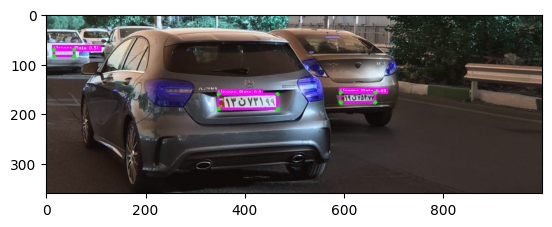

In [43]:
images = predict_on_image(
    image_path='/content/assets/Iranian license plate1.jpg',
    model_path='/content/drive/MyDrive/weights/Persian License Plate.pt', is_save=True, is_show=True
)

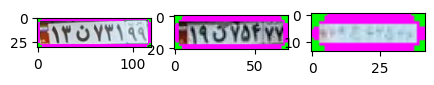

In [47]:
fig, ax = plt.subplots(ncols=3, figsize=(5, 5))
for idx, img in enumerate(images):
    ax[idx].imshow(img)
plt.show()


0: 480x640 1 License-Plate, 64.2ms
Speed: 1.8ms preprocess, 64.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


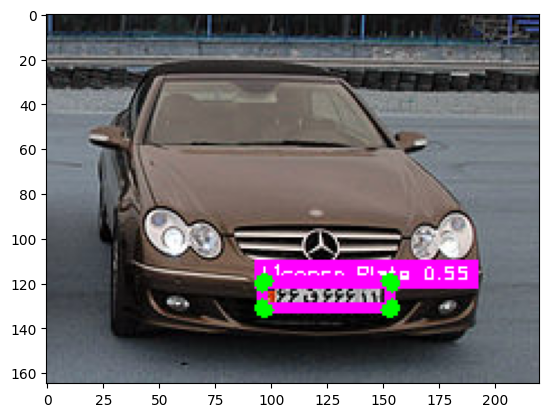

In [52]:
images = predict_on_image(
    image_path='/content/assets/Iranian license plate2.jpg',
    model_path='/content/drive/MyDrive/weights/Persian License Plate.pt', is_save=True, is_show=True
)

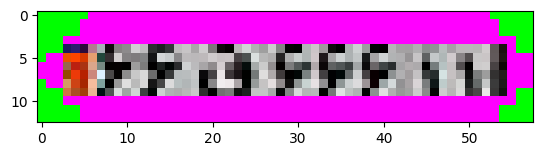

In [55]:
plt.imshow(images[0], )
plt.show()

In [ ]:
def predict_on_video(video_path: str, model_path: str) -> None:
    model = YOLO(model_path)
    classes: list[str] = ['License Plate']
    cap = cv.VideoCapture(video_path)

    while True:
        frame = cap.read()[1]
        results: Results = model(frame)
        for result in results:
            boxes = result.boxes
            for box in boxes:
                conf = math.ceil(box.conf[0] * 100) / 100
                if conf >= .5:
                    x1, y1, x2, y2 = map(lambda x: int(x), box.xyxy[0])
                    w, h = x2 - x1, y2 - y1

                    currentClass = classes[int(box.cls[0])]

                    frame = put_text_rect(frame, f'{currentClass} {conf}', (max(0, x1), max(35, y1)),
                                        scale=.6, thickness=1, offset=3)
                    frame = corner_rect(frame, (x1, y1, w, h), l=9, rt=5)
        cv.imshow('webcam', frame)
        if cv.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv.destroyAllWindows()

predict_on_video(video_path='video.mp4', model_path='model.pt')

In [ ]:
def predict_on_video_jupyter(video_path: str, model_path: str) -> None:
    model = YOLO(model_path)
    classes: list[str] = ['License Plate']
    model(video_path, save=True)